In [1]:
import torch
import torchvision
from torchvision import models,datasets,transforms
import os
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [36]:
dir = './data1'
dir(models)



TypeError: 'str' object is not callable

In [4]:
z

In [6]:
print('Train dataset = {}\n'.format(len(train_dataset)),'Val dataset = {}'.format(len(val_dataset)),'Test dataset = {}'.format(len(test_dataset)))
print('Classes = {}'.format(class_names))

Train dataset = 3727
 Val dataset = 848 Test dataset = 3
Classes = ['covid', 'normal', 'pneumonia']


In [10]:
def train(model, loss_fn, optimizer, num_epochs=15):

    best_acc = 0

    for epoch in range(num_epochs):
        
        print('Epoch {}'.format(epoch+1))
        
        # Train dataset
        model.train()
        train_loss = 0.0
        train_correct = 0
        size = len(train_dataset)
        for inputs, labels in train_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad() # zero the gradients
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            train_correct += torch.sum(preds == labels.data)
            
        train_loss = train_loss / size
        train_acc = train_correct.double() / size
            
        print('Training Loss: {} Acc: {}'.format(train_loss, train_acc))
        
        # Validation dataset
        model.eval()
        val_loss = 0.0
        val_correct = 0
        size = len(val_dataset)
        for inputs, labels in val_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad() # zero the gradients
            with torch.no_grad():
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = loss_fn(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            val_correct += torch.sum(preds == labels.data) 

        val_loss = val_loss / size
        val_acc = val_correct.double() / size    

        print('Validation Loss: {} Acc: {}'.format(val_loss, val_acc))    
            
        if val_acc > best_acc:
            best_acc = val_acc
        
       

In [ ]:
 # Test dataset
        model.eval()
        test_loss = 0.0
        test_correct = 0
        size = len(test_dataset)
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad() # zero the gradients
            with torch.no_grad():
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = loss_fn(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            test_correct += torch.sum(preds == labels.data) 

        test_loss = test_loss / size
        test_acc = test_correct.double() / size    

        print('Test Loss: {} Acc: {}'.format(test_loss, test_acc))
          if test_acc > best_acc:
            best_acc = test_acc
    

In [11]:
net = torchvision.models.densenet121(pretrained=True)
for param in net.parameters():
    param.requires_grad = False # freeze all the weights

ft = net.classifier.in_features # final layer of the densenet
net.classifier = nn.Linear(ft, 5) # new layer according to our dataset with weights unfrozen

net = net.to(device)

loss = nn.CrossEntropyLoss()

# only final layer optimized
optimizer = optim.SGD(net.classifier.parameters(), lr=0.001, momentum=0.9) 

C:\Users\Utente\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Utente\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
net = train(net,loss,optimizer,num_epochs=15)

Epoch 1


KeyboardInterrupt: 

In [ ]:
net.eval()

fig = plt.figure()

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

with torch.no_grad():
    for i, (inputs, labels) in enumerate(val_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        for j in range(5):
            ax = plt.subplot(1, 1, 1)
            ax.axis('off')
            ax.set_title('predicted: {}  actual: {}'.format(class_names[preds[j]],class_names[labels[j]]))
            imshow(inputs.cpu().data[j])
        break

In [9]:
model = models.densenet121(pretrained=True)
model.eval()  # sets the model in evaluation mode
# For more info about evaluation:# https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
   input_batch = input_batch.to('cuda')
   model.to('cuda')

C:\Users\Utente\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Utente\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\Utente/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [ ]:
with torch.no_grad():
   output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for id,prob in zip(top5_catid,top5_prob):
  print(f'Image class: {img_classes[id]}\t----- {prob * 100:.4f} %')


In [12]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Attention

# Load the dataset and perform preprocessing
import torch
from PIL import Image
from torchvision import transforms,models    
import matplotlib.pyplot as pltb




In [13]:
data_path = fr'./data'


In [14]:
with open("./data" ) as f:
    img_classes = [s.strip() for s in f.readlines()]
print("Total Image Classes :{}".format(len(img_classes)))
print(img_classes[:5]) #displaying first five images

PermissionError: [Errno 13] Permission denied: './data'

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: 'dataset/training_set'

In [8]:
# Define the model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.add(Attention())

ValueError: Exception encountered when calling layer "attention_1" (type Attention).

Attention layer must be called on a list of inputs, namely [query, value] or [query, value, key]. Received: Tensor("Placeholder:0", shape=(None, 1), dtype=float32).

Call arguments received by layer "attention_1" (type Attention):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • mask=None
  • training=None
  • return_attention_scores=False
  • use_causal_mask=False

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [10]:

# Train the model
model.fit_generator(training_set,
                    steps_per_epoch = 8000,
                    epochs = 25,
                    validation_data = test_set,
                    validation_steps = 2000)

NameError: name 'training_set' is not defined

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import torch
from PIL import Image
from torchvision import transforms,models    
import matplotlib.pyplot as plt


In [16]:
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras_utils
import cv2
import imghdr

%matplotlib inline
np.random.seed(1)

In [17]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [18]:
data_path = fr'./data'
os.listdir(data_path)

['covid', 'metadata.csv', 'normal', 'pneumonia']

In [19]:
with open("./data", "r") as f:
    img_classes = [s.strip() for s in f.readlines()]
print("Total Image Classes :{}".format(len(img_classes)))
print(img_classes[:5]) #displaying first five classes


PermissionError: [Errno 13] Permission denied: './data'

In [19]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, width, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
    data = dict()
    data['description'] = 'resized ({0}x{1})cell images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
    
            
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        print(subdir)
        current_path = os.path.join(src, subdir)

        for file in os.listdir(current_path):
             if file[-4:] in {'.jpg', '.png','jpeg'}:
                im = imread(os.path.join(current_path, file), as_gray=True)
                im = resize(im, (width, height)) #[:,:,::-1]
                data['label'].append(subdir)
                data['filename'].append(file)
                data['data'].append(im)

    joblib.dump(data, pklname)
    

    

data = "./data"
resize_all(src=data, width=256, pklname='data22')

covid
normal
pneumonia


In [20]:
from collections import Counter
width=256
 
data = joblib.load(f'{"data22"}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  4575
keys:  ['description', 'label', 'filename', 'data']
description:  resized (256x256)cell images in rgb
image shape:  (256, 256)
labels: ['covid' 'normal' 'pneumonia']


Counter({'covid': 1525, 'normal': 1525, 'pneumonia': 1525})

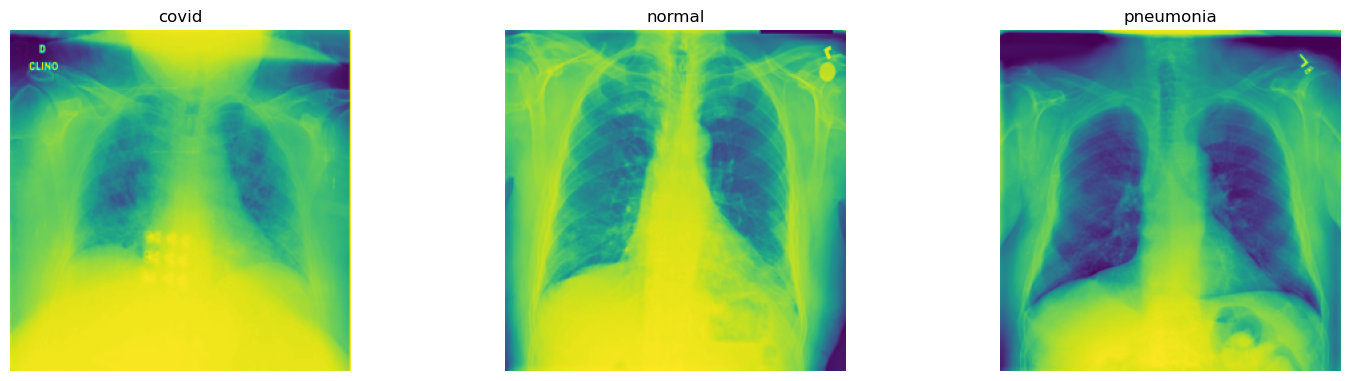

In [21]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [22]:
X = np.array(data['data'])
y = np.array(data['label'])

In [23]:
y_list = np.unique(y, return_inverse=True)[1].tolist()
new_labels = []
for label in y_list:
    if label == 0:
        new_labels.append([1, 0, 0])
    elif label == 1:
        new_labels.append([0, 1, 0])
    else:
        new_labels.append([0, 0, 1])

y = np.array(new_labels)

In [24]:
#reshaping the dataset
X = X.reshape(4575, 256, 256, 1)

In [25]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
X_valid,X_Test,y_valid,y_Test= train_test_split(
    X_test, 
    y_test, 
    test_size=0.2, 
    shuffle=True,
    random_state=52,
)

In [26]:
X_train = X_train.astype('float32') / 255.
X_valid = X_valid.astype('float32') / 255.

X_train = np.reshape(X_train, (len(X_train), 256, 256, 1))
X_valid = np.reshape(X_valid, (len(X_valid), 256, 256, 1))

CNN

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(5, 5), strides =(1, 1), activation ='relu'))
model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))
model.add(MaxPooling2D(pool_size =(2, 2), strides =(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (5, 5), activation ='relu'))
model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))
model.add(MaxPooling2D(pool_size =(2, 2)))
model.add(Conv2D(16, kernel_size =(5, 5), strides =(1, 1), activation ='relu'))
model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))
model.add(MaxPooling2D(pool_size =(2, 2), strides =(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation ='relu'))
model.add(Dense(3, activation ='softmax'))
model.build(input_shape=(20,256, 256,1))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (20, 252, 252, 32)        832       
                                                                 
 batch_normalization_3 (Batc  (20, 252, 252, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (20, 126, 126, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (20, 126, 126, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (20, 122, 122, 64)        51264     
                                                                 
 batch_normalization_4 (Batc  (20, 122, 122, 64)      

In [29]:
#adam optimizer with 0.0001 learning rate was chosen after several attempts with other optimizers like Adagrad, SGD ets
#and different values of learning rate

In [30]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']) #categorical cause we have more than 2 classes

In [31]:
history=model.fit(x=X_train, y=y_train, batch_size=15, epochs=15,verbose=2, validation_data=(X_valid,y_valid))

Epoch 1/15
244/244 - 651s - loss: 0.5231 - accuracy: 0.8115 - val_loss: 1.3855 - val_accuracy: 0.3224 - 651s/epoch - 3s/step
Epoch 2/15
244/244 - 617s - loss: 0.3381 - accuracy: 0.8803 - val_loss: 1.1931 - val_accuracy: 0.4617 - 617s/epoch - 3s/step
Epoch 3/15
244/244 - 664s - loss: 0.2996 - accuracy: 0.8951 - val_loss: 0.6169 - val_accuracy: 0.7404 - 664s/epoch - 3s/step
Epoch 4/15
244/244 - 850s - loss: 0.2532 - accuracy: 0.9178 - val_loss: 0.6046 - val_accuracy: 0.7445 - 850s/epoch - 3s/step
Epoch 5/15
244/244 - 899s - loss: 0.2138 - accuracy: 0.9270 - val_loss: 0.5467 - val_accuracy: 0.7760 - 899s/epoch - 4s/step
Epoch 6/15
244/244 - 847s - loss: 0.1945 - accuracy: 0.9298 - val_loss: 0.4627 - val_accuracy: 0.8238 - 847s/epoch - 3s/step
Epoch 7/15


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#the final performance of the model is evaluated with the help of confusion matrix

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5,figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(X_Test)
print(y_Test[:5])

In [ ]:
X_Test= X_Test.astype('float32') / 255.

X_Test = np.reshape(X_Test, (len(X_Test), 256, 256, 1))

In [ ]:
results = model.evaluate(X_Test, y_Test, batch_size=128)
print("test loss, test acc:", results)

In [ ]:
predictions=model.predict(x=X_Test,verbose=0)

In [ ]:
predictions

In [ ]:
predictions = np.argmax(predictions, axis=-1)

In [ ]:
predictions

In [ ]:
rounded_labels=np.argmax(y_Test,axis=-1)

In [ ]:
rounded_labels

In [ ]:
y_true = np.array(rounded_labels)
y_pred = np.array(predictions)

In [ ]:
y_pred

In [ ]:
cm = confusion_matrix(y_true=y_true_binary, y_pred=y_pred_binary)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh =cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels=['Covid','Normal','Pneumonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion matrix')

VGG16

In [ ]:
#instead of adding more and more layers to our cnn model we decided to use already pre trained existing models like vgg16 and mobileNet

In [ ]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

In [ ]:
#to implement our own sequential model we choose all the layers of the vgg16 model except for the last one,
#cause we need to do prediction for 3 classes instead of 1000
model_vgg16=Sequential()
for layer in vgg16_model.layers[:-1]:
    model_vgg16.add(layer)

In [ ]:
#vgg16 model has 138,357,544 Trainable params so to train it entirely takes a lot of time and actually it is not necessary since
#the model is already trained
#so to adapt it to our case we train only last layers of the model (the final number of layers to train was chosen according 
#to the accuracy achieved after training and time that the model needs to train )
for layer in model_vgg16.layers[:-5]:
    layer.trainable=False
#to achieve better results its better to train at least some of last layers layers

In [ ]:
model_vgg16.add(Dense(units=3,activation='softmax'))

In [ ]:
model_vgg16.summary()

In [ ]:
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']) #categorical cause we have more than 2 classes

In [ ]:
history=model_vgg16.fit(x=train_batches, validation_data=valid_batches, epochs=10,verbose=2)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

in the beginning i trained without training the model and the max accurcy without overfitting is 80 

In [ ]:
test_imgs, test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

In [ ]:
predictions=np.round(model_vgg16.predict(x=test_batches,verbose=0))

In [ ]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh =cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels=['CLL','FL','MCL']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion matrix')

In [ ]:
#as it was excpected the results of the more complex model are better respect to our more simple cnn model which has less params to train

MOBILENET (little bit less accurate, but less heavy)

In [ ]:
#mobilenet model is a bit faster tot rain respect to vgg16, but it is less accurate

In [ ]:
mobile=tf.keras.applications. mobilenet.MobileNet()

In [ ]:
mobile.summary()

In [ ]:
#all the layers till the 6th one
x=mobile.layers[-1].output
output=Dense(units=3, activation='softmax')(x)


In [ ]:
model_mobile= Model(inputs=mobile.input,outputs=output)

In [ ]:
#since the mobile net is faster to train we can train more layers 
for layer in model_mobile.layers[:-23]:
    layer.trainable=False

In [ ]:
model_mobile.summary()

In [ ]:
model_mobile.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model_mobile.fit(x=train_batches, validation_data=valid_batches, epochs=20,verbose=2)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_imgs, test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
predictions=np.round(model_mobile.predict(x=test_batches,verbose=0))

In [ ]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh =cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels=['CLL','FL','MCL']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion matrix')

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, TimeDistributed, Activation, Dropout, Attention
def build_rnn_model_with_attention(input_shape, vocab_size, num_classes, lstm_units, dropout_rate):
    model = Sequential()
    model.add(Embedding(vocab_size, lstm_units, input_length=input_shape[1]))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(Attention())
    model.add(Dense(num_classes, activation='softmax'))
    return model
input_shape = (max_len, )
vocab_size = len(word_index) + 1
num_classes = len(labels)
lstm_units = 128
dropout_rate = 0.2
model = build_rnn_model_with_attention(input_shape, vocab_size, num_classes, lstm_units, dropout_rate)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'max_len' is not defined